CUSTOMER REVIEWS AND BIG DATA
Identifying the banks with the highest and lowest ratings.

*   We Analyze the common themes mentioned in positive reviews to reinforce positive aspects in our bank and address issues raised in negative reviews.




In [5]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('Banks.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv("AcrossBanks.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19271 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    19270 non-null  object 
 1   date      19271 non-null  object 
 2   location  19271 non-null  object 
 3   bank      19271 non-null  object 
 4   star      19271 non-null  int64  
 5   text      19181 non-null  object 
 6   like      17769 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


In [8]:
df.isna().sum()

author         1
date           0
location       0
bank           0
star           0
text          90
like        1502
dtype: int64

In [9]:
df.dropna(subset=['author', 'text'], inplace=True)
df['like'].fillna(0, inplace=True)

In [10]:
df.isna().sum()

author      0
date        0
location    0
bank        0
star        0
text        0
like        0
dtype: int64

We are Converting the 'date' column, which is initially in a string format, into a Pandas datetime data type, making it easier to work with dates and enabling us to perform various date-related operations.

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19180 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   author    19180 non-null  object        
 1   date      19180 non-null  datetime64[ns]
 2   location  19180 non-null  object        
 3   bank      19180 non-null  object        
 4   star      19180 non-null  int64         
 5   text      19180 non-null  object        
 6   like      19180 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


Now, we are splitting the 'date' column into day, month, and year into separate columns

In [13]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [14]:
df.drop(columns=['date'], inplace=True)

In [15]:
df.head()

,author,location,bank,star,text,like,day,month,year
0,Kyle,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,0.0,31,8,2023
1,Julicia,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,0.0,23,8,2023
2,Karen,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0,2,6,2023
3,Brent,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0,29,3,2023
4,Sharon,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0,23,11,2022


# Exploratory Data Analysis
Exploratory Data Analysis (EDA) in machine learning involves exploring and summarizing data to gain insights. Applied to customer data, EDA enhances experiences by uncovering behavior patterns, identifying customer segments, and optimizing services. It enables personalization, improves product recommendations.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19180 entries, 0 to 19270
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    19180 non-null  object 
 1   location  19180 non-null  object 
 2   bank      19180 non-null  object 
 3   star      19180 non-null  int64  
 4   text      19180 non-null  object 
 5   like      19180 non-null  float64
 6   day       19180 non-null  int64  
 7   month     19180 non-null  int64  
 8   year      19180 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.5+ MB



This Python code generates a bar plot using Seaborn to showcase the distribution of reviews across different banks in the DataFrame 'df'. With a carefully chosen color palette and rotated labels for clarity, it provides a quick and visually appealing overview of the number of reviews for each bank, facilitating easy analysis of customer sentiments.

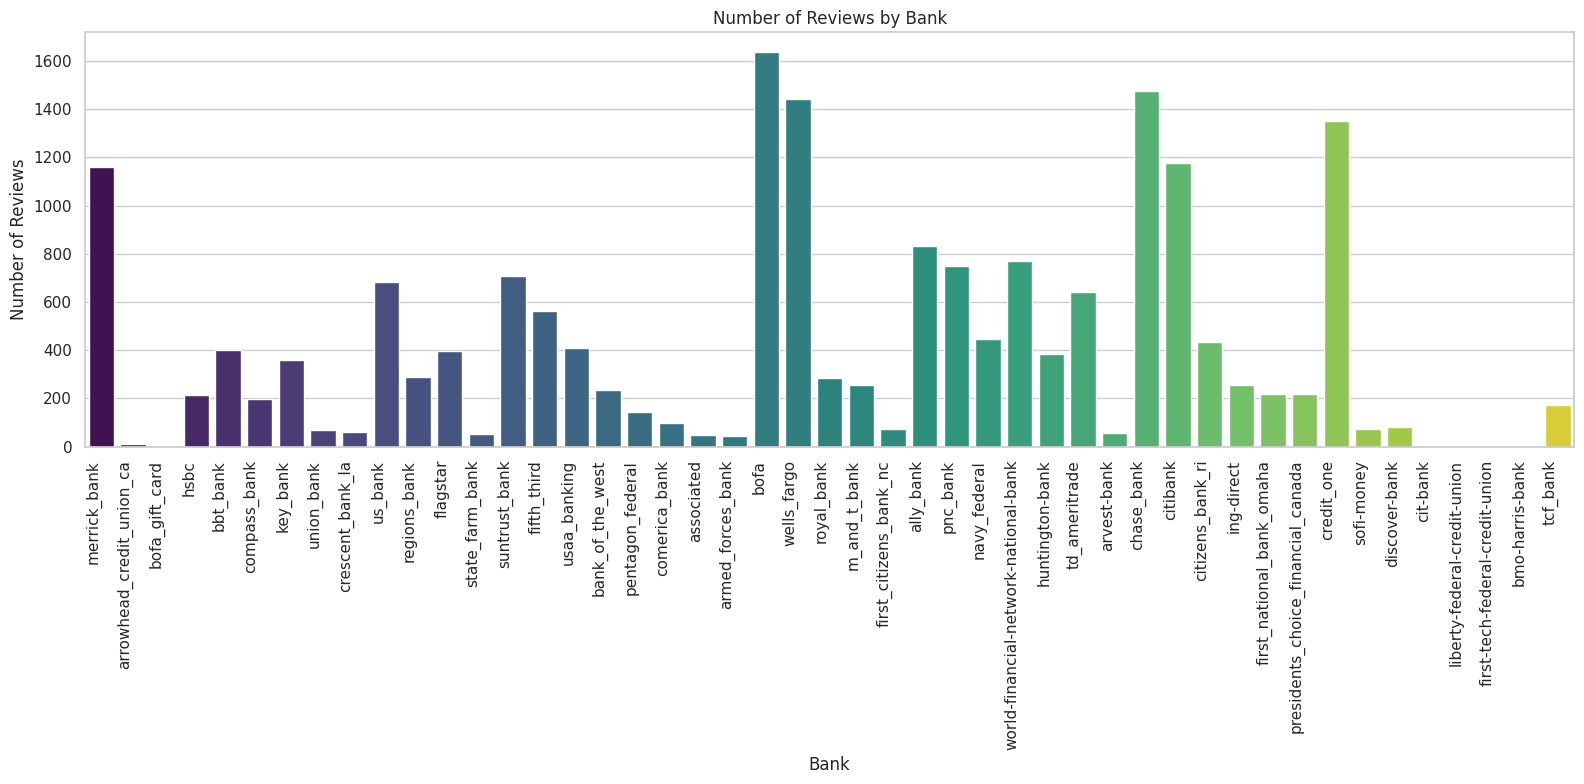

In [18]:
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df, x="bank", palette="viridis")
plt.title("Number of Reviews by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.tight_layout()

plt.show()

This code utilizes Seaborn to create a histogram, displaying the distribution of star ratings in a DataFrame. The plot includes a kernel density estimate for a smoother representation, aiding in visualizing the frequency of each star rating.

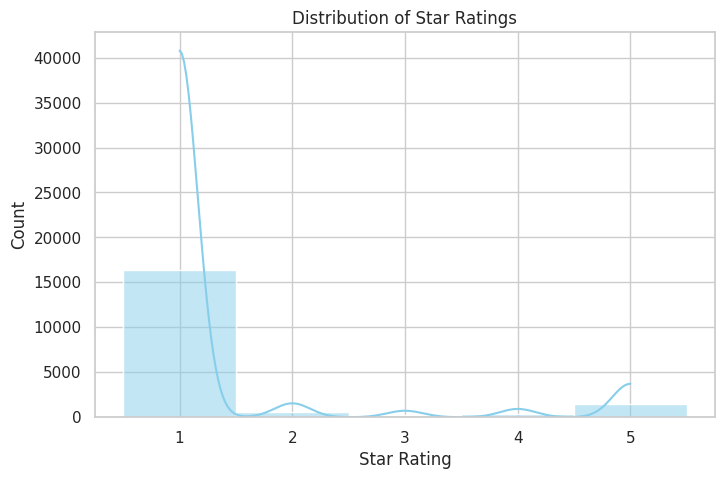

In [19]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="star", discrete=True, kde=True, color="skyblue")
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")

plt.show()

It analyzes the variation in average star ratings over different months and years for reviews in the DataFrame 'df'. It creates a line chart with separate lines for each month, allowing a clear observation of how star ratings evolve over time. The legend assists in identifying specific months, while the grid enhances readability. This visualization aids in understanding patterns and trends in customer feedback throughout different periods.

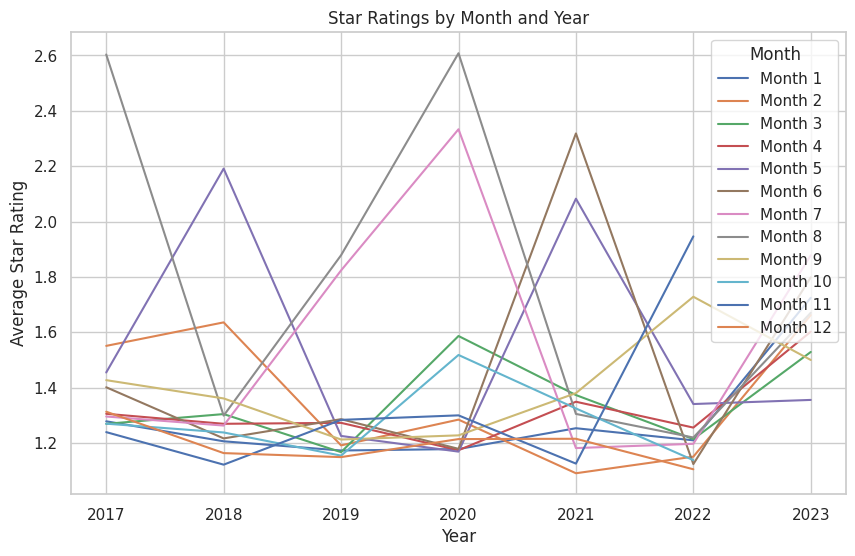

In [20]:
avg_star_ratings = df.groupby(['year', 'month'])['star'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Star Ratings by Month and Year")
plt.xlabel("Year")
plt.ylabel("Average Star Rating")
for month, group in avg_star_ratings.groupby('month'):
    plt.plot(group['year'], group['star'], label=f"Month {month}")

plt.legend(title="Month", loc="upper right")
plt.grid(True)

plt.show()

The plot provides a visual representation of the review distribution across different locations, aiding in identifying the most frequently reviewed places.

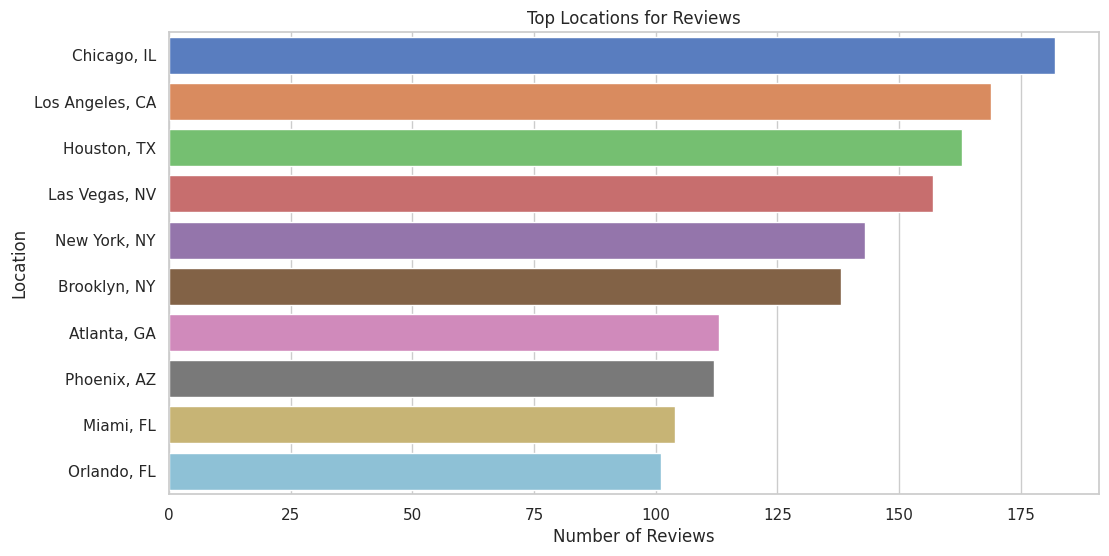

In [21]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
top_locations = df["location"].value_counts().head(10)
sns.barplot(x=top_locations, y=top_locations.index, palette="muted")
plt.title("Top Locations for Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Location")

plt.show()

The scatter plot visualizes how the number of likes varies with different star ratings in customer reviews of banks. Each point on the plot represents a review, with the x-axis showing the star rating given by the customer and the y-axis representing the number of likes that review received. The plot helps identify patterns or trends in the relationship between star ratings and user engagement (likes).

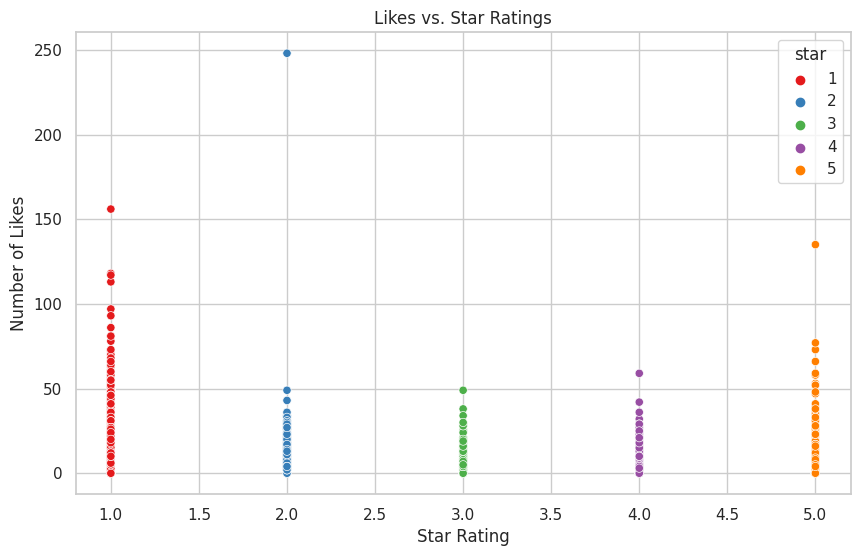

In [22]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="star", y="like", hue="star", palette="Set1")
plt.title("Likes vs. Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Likes")

plt.show()


 The visualization provides insight into the most prolific contributors, highlighting authors with the highest review counts.


*   It addresses that public sympathises with their opinions
*   We can contact them or review their Opinion



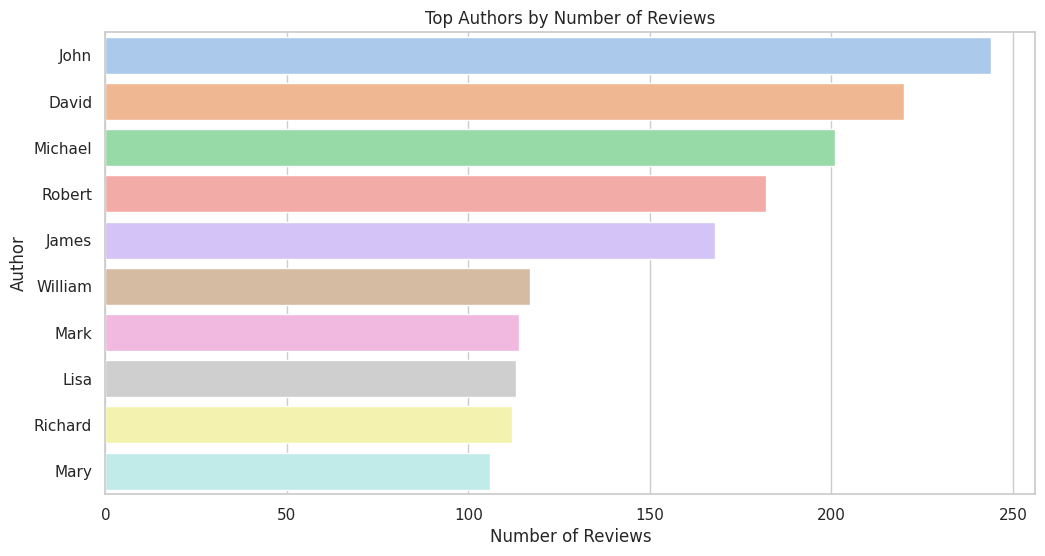

In [23]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
top_authors = df["author"].value_counts().head(10)
sns.barplot(x=top_authors, y=top_authors.index, palette="pastel")
plt.title("Top Authors by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Author")

plt.show()

The plot provides an overview of review counts for each day, offering insights into the temporal distribution of customer feedback.
*   It tells when the customers are usually available to give reviews. Hence, We can use that to generate more worthy reviews

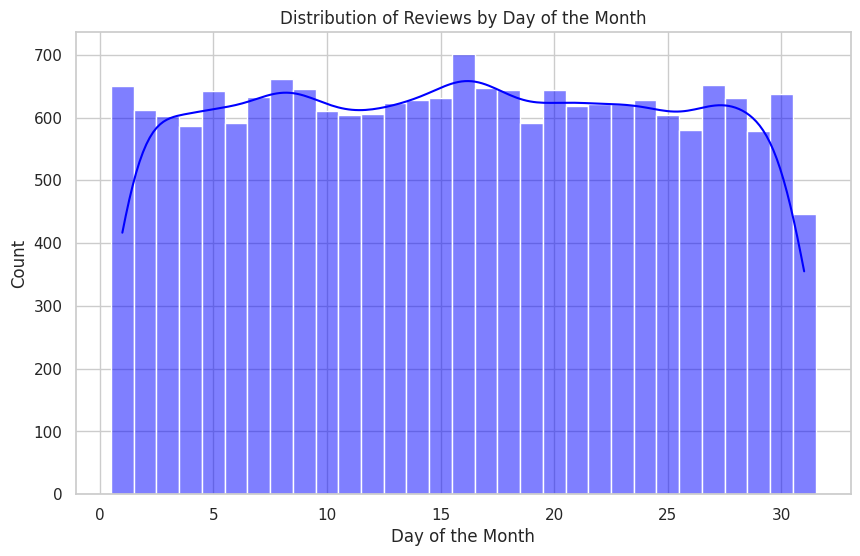

In [24]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="day", discrete=True, kde=True, color="blue")
plt.title("Distribution of Reviews by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Count")

plt.show()

 The plot provides a visual representation of how the volume of reviews has evolved annually, offering insights into trends or patterns in customer feedback over time.







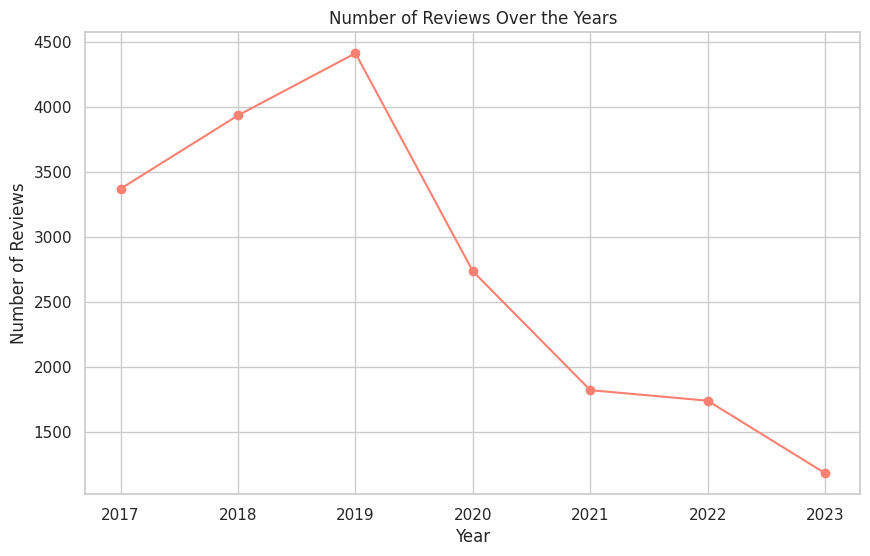

In [25]:
reviews_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(reviews_by_year.index, reviews_by_year.values, marker='o', color='salmon')
plt.title("Number of Reviews Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")

plt.show()


We can use this data and learn from their Schemes and ways to handle Customer Service

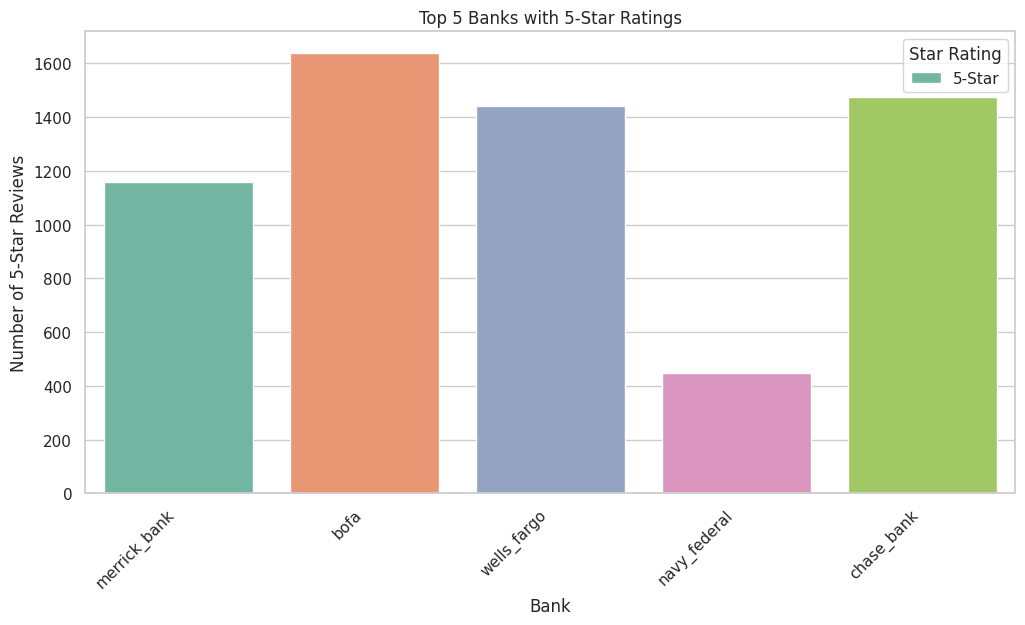

In [26]:
top_5_star_banks = df[df['star'] == 5]['bank'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df[df['bank'].isin(top_5_star_banks)], x="bank", palette="Set2")
ax.set_title("Top 5 Banks with 5-Star Ratings")
ax.set_xlabel("Bank")
ax.set_ylabel("Number of 5-Star Reviews")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.legend(title='Star Rating', labels=['5-Star'])

plt.show()

We can Avoid or learn from the techniques and schemes

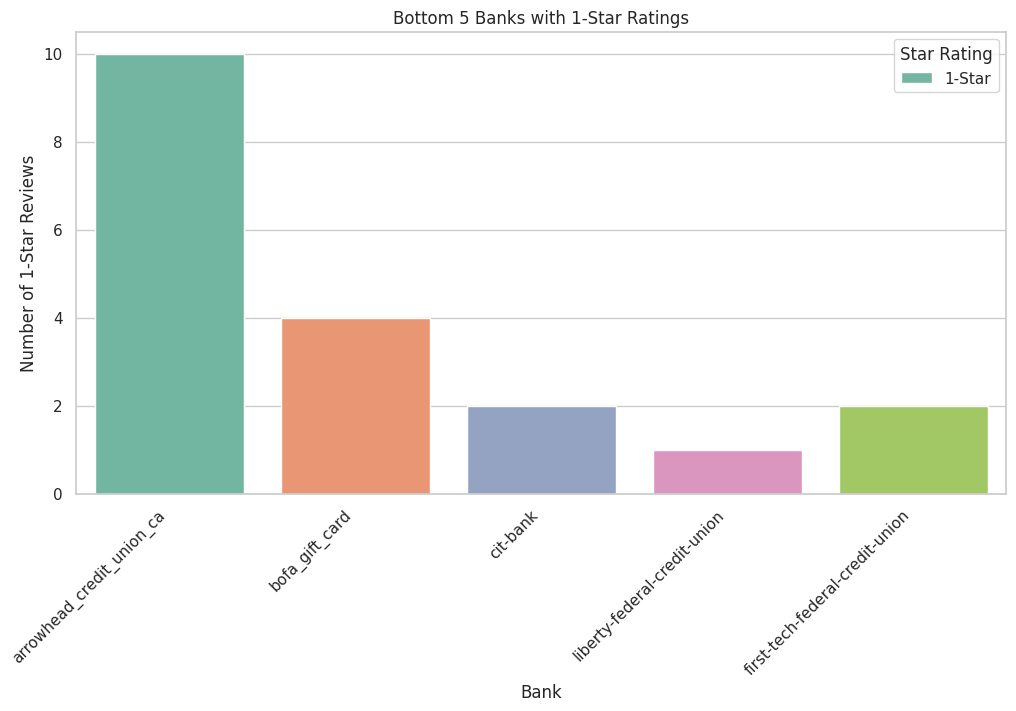

In [27]:
bottom_1_star_banks = df[df['star'] == 1]['bank'].value_counts().nsmallest(5).index

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df[df['bank'].isin(bottom_1_star_banks)], x="bank", palette="Set2")
ax.set_title("Bottom 5 Banks with 1-Star Ratings")
ax.set_xlabel("Bank")
ax.set_ylabel("Number of 1-Star Reviews")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.legend(title='Star Rating', labels=['1-Star'])

plt.show()

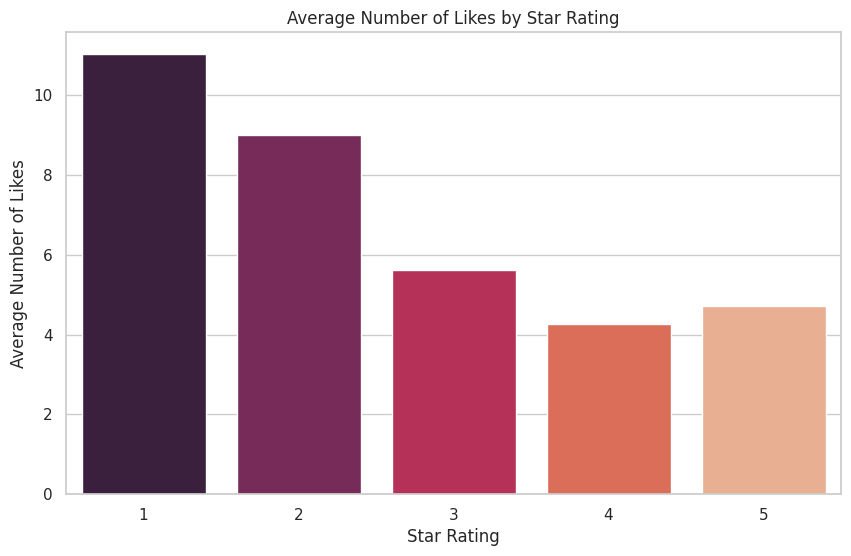

In [28]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=df, x="star", y="like", estimator="mean", errorbar=None, palette="rocket")
plt.title("Average Number of Likes by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Average Number of Likes")

plt.show()

Natural Language Processing

In [29]:
df['text'][8]

'I have been a Merrick customer for about a decade now. There has never been a problem, dispute, or even a call to customer service. In this day and age, that is phenomenal. Truly happy with this company and have recommended them to many friends. Thank you for your continuing service.'

In [30]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.5 MB/s eta 0:00:00


In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import re
from wordcloud import WordCloud
import torch

This code employs the BERT tokenizer from the Hugging Face Transformers library. It defines a function, that tokenizes the input text using BERT's tokenizer, removes special characters and punctuation, and converts the text to lowercase. This preprocessing is common in natural language processing tasks to enhance the quality of input text for machine learning models.







In [32]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
def clean_and_tokenize(text):
    tokens = tokenizer.tokenize(text)
    cleaned_text = " ".join(tokens)
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = cleaned_text.lower()

    return cleaned_text

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [33]:
example_text = "I have been a Merrick customer for about a decade now. There has never been a problem, dispute, or even a call to customer service. In this day and age, that is phenomenal. Truly happy with this company and have recommended them to many friends. Thank you for your continuing service."
cleaned_text = clean_and_tokenize(example_text)
print(cleaned_text)

i have been a mer rick customer for about a decade now  there has never been a problem  dispute  or even a call to customer service  in this day and age  that is phenomena l  truly happy with this company and have recommended them to many friends  thank you for your continuing service 


This code generates a word cloud visualization from customer reviews.The WordCloud library is then used to create a visual representation where word size corresponds to frequency. The resulting image offers an intuitive snapshot of the most prominent words in the aggregated customer reviews.







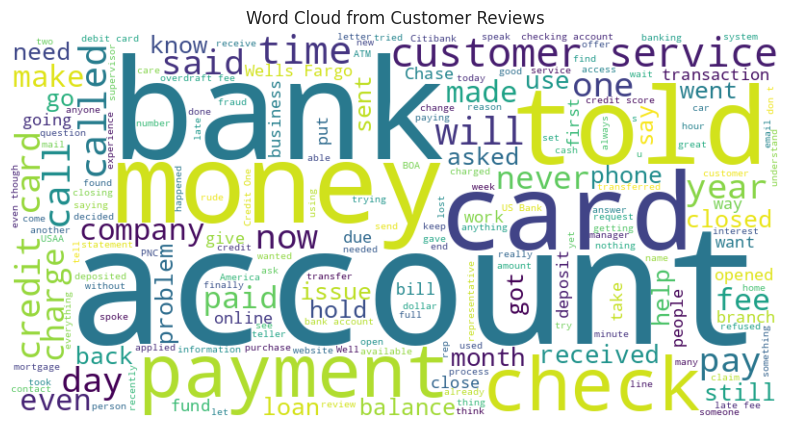

In [34]:
all_cleaned_text = " ".join(df['text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Customer Reviews")
plt.show()

Sentiment Analysis :  If the rating is 3 or higher, it is labeled as 1 (positive), otherwise, it is labeled as 0 (negative). The sentiment labels are then added to the DataFrame as a new column, 'sentiment', providing a binary indicator of sentiment for each review. The final output displays relevant columns ('bank', 'star', 'sentiment') from the DataFrame.

In [35]:
def get_sentiment(star):
    if star >= 3:
        return 1  # Positive YAY
    else:
        return 0  # Negative NAY
df['sentiment'] = df['star'].apply(get_sentiment)
df[['bank', 'star', 'sentiment']]

,bank,star,sentiment
0,merrick_bank,5,1
1,merrick_bank,5,1
2,merrick_bank,4,1
3,merrick_bank,5,1
4,merrick_bank,5,1
...,...,...,...
19266,tcf_bank,1,0
19267,tcf_bank,1,0
19268,tcf_bank,1,0
19269,tcf_bank,1,0


The chart represents the proportion of positive and negative sentiments, providing a visual overview of the sentiment distribution in the dataset.

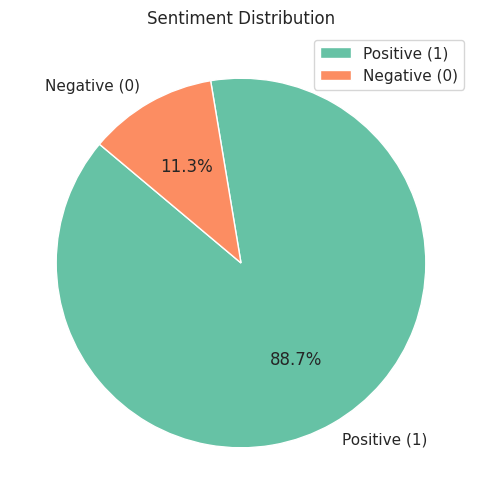

In [36]:
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
colors = sns.color_palette("Set2")
plt.pie(sentiment_counts, labels=['Positive (1)', 'Negative (0)'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.legend(['Positive (1)', 'Negative (0)'], loc='upper right')

plt.show()

Word Frequency Analysis:
Analyze the frequency of words in the reviews.
Visualize the most common words using a word cloud.

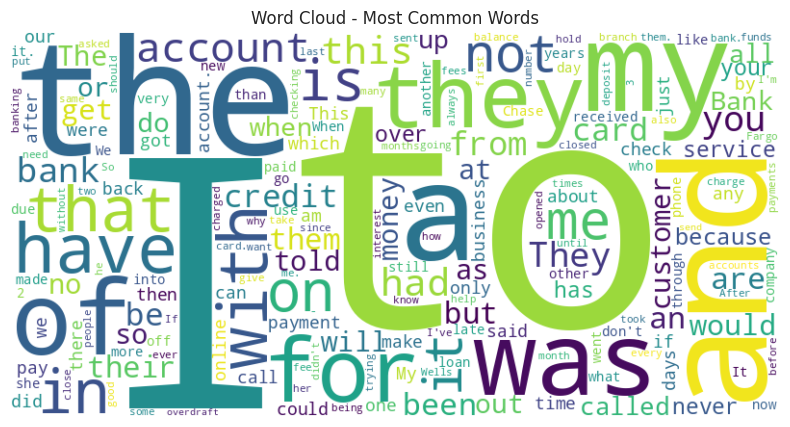

In [37]:
from collections import Counter
word_tokens = " ".join(df['text'].dropna()).split()
word_freq = Counter(word_tokens)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Most Common Words")
plt.show()


The chart provides a clear visual representation of the review counts for different banks, with customized axis labels and tick angles for improved readability. We can use Data from them to increase productivity to point out the exact changes

In [38]:
import plotly.express as px

fig = px.bar(df, x="bank", title="Number of Reviews by Bank", labels={"bank": "Bank", "count": "Number of Reviews"})
fig.update_layout(xaxis_title="Bank", yaxis_title="Number of Reviews", xaxis_tickangle=-45)
fig.show()

Interactive Visualizations:
Use interactive plotting libraries like Plotly to create dynamic visualizations.


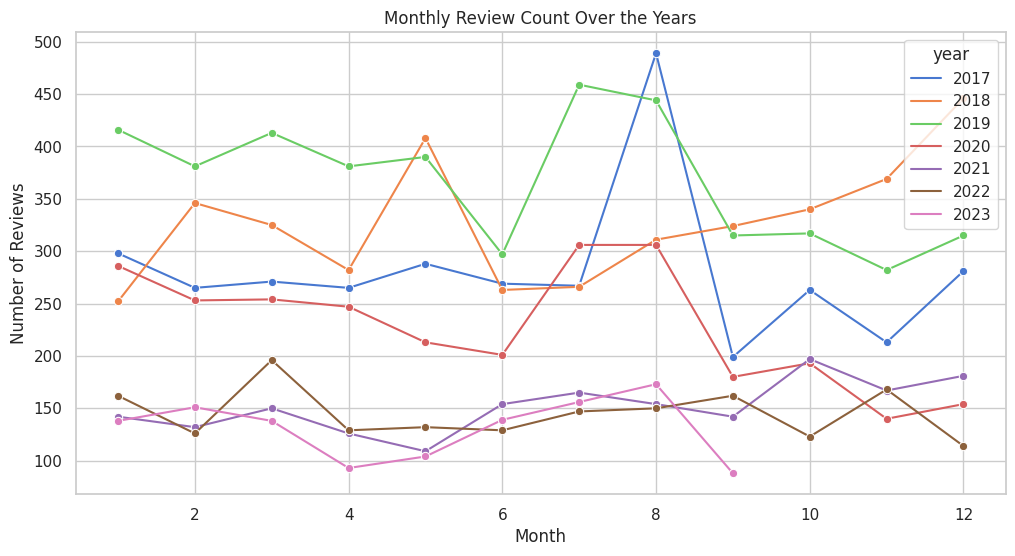

In [39]:
monthly_review_count = df.groupby(['year', 'month']).size().reset_index(name='review_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_review_count, x="month", y="review_count", hue="year", marker="o", palette="muted")
plt.title("Monthly Review Count Over the Years")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()

Review Topics Analysis:
Apply topic modeling techniques (e.g., Latent Dirichlet Allocation) to identify main topics in the reviews.
 The loop prints the top 10 words associated with each identified topic, providing insight into the themes present in the customer reviews.







In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['text'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


for i, topic in enumerate(lda.components_):
    print(f"Top words for Topic {i + 1}: {', '.join([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])}")


Top words for Topic 1: time, fargo, wells, banking, ve, business, years, service, customer, bank
Top words for Topic 2: day, told, checking, days, funds, deposit, check, money, bank, account
Top words for Topic 3: payments, balance, paid, fee, pay, account, late, payment, card, credit
Top words for Topic 4: said, number, bank, phone, told, service, customer, card, called, account
Top words for Topic 5: payments, home, ally, pay, company, car, bank, mortgage, payment, loan


Review Similarity Analysis:
Calculate the similarity between reviews and identify similar reviews.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'].dropna())

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
def get_similar_reviews(review_index, cosine_sim_matrix, top_n=5):
    similar_reviews = list(enumerate(cosine_sim_matrix[review_index]))
    similar_reviews = sorted(similar_reviews, key=lambda x: x[1], reverse=True)[1:top_n + 1]
    return similar_reviews

similar_reviews_indices = get_similar_reviews(0, cosine_sim)
similar_reviews_df = df.iloc[[index[0] for index in similar_reviews_indices]]


Positive and Negative Word Analysis:
Identify and visualize the most common positive and negative words in the reviews.

In [42]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#Rule-Based Segmentation:

Rule-based segmentation is a method of categorizing data into different segments based on predefined rules or criteria. In this context, the rule-based segmentation is applied to a dataset containing star ratings. The function rule_based_segmentation takes a star rating as input and assigns it to one of three satisfaction segments: 'High Satisfaction,' 'Moderate Satisfaction,' or 'Low Satisfaction' based on specified conditions.

*   If the star rating is equal to or greater than 4, the satisfaction is considered 'High Satisfaction.'
*   If the star rating is between 3 (inclusive) and 4 (exclusive), the satisfaction is categorized as 'Moderate Satisfaction.'
*   If the star rating is less than 3, the satisfaction is labeled as 'Low Satisfaction.'

This segmentation approach is helpful in understanding customer satisfaction levels based on the star ratings they provide. It provides a simple and interpretable way to group customers into different satisfaction categories, which can be valuable for businesses to analyze and respond to customer feedback effectively. By categorizing customers into segments, businesses can tailor their strategies and responses according to the satisfaction levels of their customers.



In [43]:
def rule_based_segmentation(star_rating):
    if star_rating >= 4:
        return 'High Satisfaction'
    elif 3 <= star_rating < 4:
        return 'Moderate Satisfaction'
    else:
        return 'Low Satisfaction'
df['segment_rule_based'] = df['star'].apply(rule_based_segmentation)


segment_counts = df['segment_rule_based'].value_counts()
print(segment_counts)


Low Satisfaction         17020
High Satisfaction         1869
Moderate Satisfaction      291
Name: segment_rule_based, dtype: int64


#Cluster-Based Segmentation
 We implemented cluster-based segmentation using K-means on our dataset. First, we preprocessed the 'date' column, extracting day, month, and year. After standardizing features like 'star' and 'like,' we applied K-means clustering to categorize data into three clusters. This method is pivotal for identifying patterns and segmenting customers based on similar behaviors, enhancing our understanding of diverse customer characteristics. With this segmentation, we can conduct targeted analyses, tailor strategies for specific clusters, and make more informed decisions. This approach provides valuable insights, guiding us in crafting personalized marketing and service strategies for improved customer engagement.

In [47]:
from sklearn.preprocessing import StandardScaler
features_for_clustering = ['day', 'month', 'year', 'star', 'like']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])

num_clusters = 3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,author,location,bank,star,text,like,day,month,year,sentiment,segment_rule_based,cluster
0,Kyle,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,0.0,31,8,2023,1,High Satisfaction,1
1,Julicia,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,0.0,23,8,2023,1,High Satisfaction,1
2,Karen,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0,2,6,2023,1,High Satisfaction,1
3,Brent,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0,29,3,2023,1,High Satisfaction,1
4,Sharon,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0,23,11,2022,1,High Satisfaction,1



Using TextBlob, sentiment analysis is added to a DataFrame, providing polarity and subjectivity insights for understanding and responding to text data.

In [48]:
from textblob import TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)


 The 'year' and 'polarity' columns from the DataFrame are plotted, with lines colored based on sentiment categories. This visualization facilitates a dynamic exploration of sentiment changes across years, aiding in trend analysis and pattern recognition.







In [49]:
fig = px.line(df, x="year", y="polarity", color="sentiment", title="Sentiment Over Time")
fig.update_layout(xaxis_title="Year", yaxis_title="Sentiment Polarity")
fig.show()